In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'Cryptocurrency Prices Dataset.csv', 'sample_data']


In [ ]:
import pandas as pd # Import pandas with the alias pd

dataset = pd.read_csv("/content/BNB-USD.csv", engine='python')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(1660, 7)

In [ ]:
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [ ]:
dataset.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
653,2019-08-24,27.163450,27.163450,26.234667,26.495663,26.495663,164452279
1511,2021-12-29,534.850037,540.615784,511.745331,514.000793,514.000793,2159325741
1210,2021-03-03,239.688980,254.253632,236.908752,241.091370,241.091370,5827707431
548,2019-05-11,19.598108,21.935244,19.084505,21.049442,21.049442,298063616
970,2020-07-06,15.480226,16.333698,15.448798,16.296770,16.296770,172232440


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03
mean,129.697342,134.406136,124.550295,129.843849,129.843849,9.488055e+08
std,187.831063,194.272600,180.550038,187.766836,187.766836,1.512638e+09
min,1.511360,1.582660,1.462560,1.510360,1.510360,9.284000e+03
25%,13.369231,13.855870,12.907175,13.377052,13.377052,1.057140e+08
50%,21.058666,21.975200,20.389466,21.052774,21.052774,2.862741e+08
75%,287.526466,302.836242,266.426819,288.547340,288.547340,1.441668e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1660 non-null   object 
 1   Open       1660 non-null   float64
 2   High       1660 non-null   float64
 3   Low        1660 non-null   float64
 4   Close      1660 non-null   float64
 5   Adj Close  1660 non-null   float64
 6   Volume     1660 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 90.9+ KB


In [ ]:
# Assuming you want column names and data types, you can access them from dataset.info():
for i in range(len(dataset.columns)):
    col_name = dataset.columns[i]
    # Assuming 'dataset' is a pandas DataFrame
    col_type = dataset[col_name].dtype
    print(f"{col_name}:\t\t{col_type}")

Date:		object
Open:		float64
High:		float64
Low:		float64
Close:		float64
Adj Close:		float64
Volume:		int64


In [ ]:
# prompt: PEREFORM PREPROCESSING

# Check for missing values
dataset.isnull().sum()

# Handle missing values (e.g., fill with mean, median, or drop rows/columns)
# Example: Fill missing values in a specific column with the mean
# dataset['column_name'].fillna(dataset['column_name'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
# Example: Use one-hot encoding for 'column_name'
# dataset = pd.get_dummies(dataset, columns=['column_name'], prefix=['column_name'])

# Scale numerical features using standardization or normalization
# Example: Use standardization for a specific column
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dataset['column_name'] = scaler.fit_transform(dataset[['column_name']])

# Remove irrelevant or redundant features (if any)
# Example: Drop a specific column
# dataset.drop(['column_name'], axis=1, inplace=True)

# You can add more preprocessing steps as needed based on your data and task.

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
import pandas as pd
import numpy as np

# Assuming your data is in a CSV file named 'data.csv'
# Replace 'data.csv' with your actual file name
X = pd.read_csv('/content/BNB-USD.csv')  # Load your data into the X variable

# Check for missing values
print(X.isnull().sum())

# Select only numeric columns for filling missing values
numeric_columns = X.select_dtypes(include=np.number).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# You can also use X.dropna() to remove rows with missing values
# Check for infinite values in numeric columns
X[numeric_columns] = X[numeric_columns].replace([np.inf, -np.inf], np.nan).fillna(X[numeric_columns].mean())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your DataFrame

# 1. Select only numeric features for scaling
numeric_features = X.select_dtypes(include=np.number).columns
X_numeric = X[numeric_features]

# 2. Check for missing values in numeric features and fill with the mean
X_numeric = X_numeric.fillna(X_numeric.mean())

# 3.Check for infinite values and replace them with NaNs and fill with mean
numeric_columns = X_numeric.select_dtypes(include=np.number).columns
X_numeric[numeric_columns] = X_numeric[numeric_columns].replace([np.inf, -np.inf], np.nan).fillna(X_numeric[numeric_columns].mean())


# 4. Apply StandardScaler to the numeric features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# 5. If needed, combine the scaled numeric features with the original non-numeric features
# X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features, index=X.index)
# X_final = pd.concat([X.drop(columns=numeric_features), X_scaled_df], axis=1)

In [ ]:
# Assuming your target variable is in a column named 'Close' in your dataset (X)
y = X['Close']  # Replace 'target_column' with the actual column name 'Close'

# Now you can check for class imbalance
print(y.value_counts())

# You can use techniques like SMOTE or class weighting to handle imbalance if needed.

Close
1.990770      1
28.064110     1
28.204916     1
31.342960     1
33.803150     1
             ..
23.811028     1
20.830297     1
21.049442     1
19.598108     1
304.335968    1
Name: count, Length: 1660, dtype: int64


In [ ]:
# Convert categorical columns to numeric using OneHotEncoding (if needed)
X = pd.get_dummies(X, drop_first=True)


In [ ]:
# Use a larger test size or perform cross-validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


XG BOAST


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform, randint

# Load the dataset
file_path = '/content/BNB-USD.csv'  # Update the path to your file in Colab
data = pd.read_csv('/content/BNB-USD.csv')

# Step 1: Feature Engineering
data['Price_Change'] = data['Adj Close'].diff().apply(lambda x: 1 if x > 0 else 0)
data.dropna(inplace=True)

# Additional features: Moving Averages, Volatility, RSI, EMA, Bollinger Bands, MACD
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['Volatility'] = data['Adj Close'].rolling(window=5).std()

def rsi(data, window):
    delta = data['Adj Close'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['RSI'] = rsi(data, window=14)
data['EMA10'] = data['Adj Close'].ewm(span=10, adjust=False).mean()
data['Upper_Band'] = data['MA10'] + (data['Volatility'] * 2)
data['Lower_Band'] = data['MA10'] - (data['Volatility'] * 2)
data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()
data.dropna(inplace=True)

# Step 2: Selecting features and target
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Volatility', 'RSI', 'EMA10', 'Upper_Band', 'Lower_Band', 'MACD']]
y = data['Price_Change']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=42)

# Step 4: Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: XGBoost Classifier with RandomizedSearchCV for faster tuning
xgb = XGBClassifier(random_state=42)

# Define the hyperparameter space
param_distributions = {
    'n_estimators': randint(50, 150),  # Smaller range for n_estimators
    'max_depth': randint(3, 7),  # Smaller range for max_depth
    'learning_rate': uniform(0.01, 0.2),  # Randomly search in the range
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.2)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best model from RandomizedSearchCV
best_xgb = random_search.best_estimator_

# Step 6: Evaluate the model
y_pred = best_xgb.predict(X_test_scaled)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost Accuracy: 86.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        43
           1       0.88      0.90      0.89        73

    accuracy                           0.86       116
   macro avg       0.85      0.85      0.85       116
weighted avg       0.86      0.86      0.86       116



LogisticRegression

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = '/content/BNB-USD.csv'  # Update the path to your file in Colab
data = pd.read_csv(file_path)

# Step 1: Feature Engineering

# Create a target variable: classify if the 'Adj Close' increases (1) or decreases (0)
data['Price_Change'] = data['Adj Close'].diff().apply(lambda x: 1 if x > 0 else 0)

# Drop rows with NaN values created by diff()
data.dropna(inplace=True)

# Create additional features: Moving Averages, Volatility, RSI, EMA, Bollinger Bands, MACD
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['Volatility'] = data['Adj Close'].rolling(window=5).std()

def rsi(data, window):
    delta = data['Adj Close'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['RSI'] = rsi(data, window=14)
data['EMA10'] = data['Adj Close'].ewm(span=10, adjust=False).mean()
data['Upper_Band'] = data['MA10'] + (data['Volatility'] * 2)
data['Lower_Band'] = data['MA10'] - (data['Volatility'] * 2)
data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()

# Drop any rows with NaN values created by rolling calculations
data.dropna(inplace=True)

# Step 2: Selecting features and target
# Features: 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Volatility', 'RSI', 'EMA10', 'Upper_Band', 'Lower_Band', 'MACD'
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Volatility', 'RSI', 'EMA10', 'Upper_Band', 'Lower_Band', 'MACD']]
y = data['Price_Change']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=42)

# Step 4: Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['lbfgs', 'saga'],  # Solver algorithms for optimization
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Step 6: Evaluate the model
y_pred = best_log_reg.predict(X_test_scaled)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression Accuracy: 82.76%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.76        43
           1       0.84      0.89      0.87        73

    accuracy                           0.83       116
   macro avg       0.82      0.81      0.81       116
weighted avg       0.83      0.83      0.83       116



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

NAIVE BAYES

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/BNB-USD.csv'  # Update the path to your file in Colab
data = pd.read_csv(file_path)

# Step 1: Feature Engineering

# Create a target variable: classify if the 'Adj Close' increases (1) or decreases (0)
data['Price_Change'] = data['Adj Close'].diff().apply(lambda x: 1 if x > 0 else 0)

# Drop rows with NaN values created by diff()
data.dropna(inplace=True)

# Create additional features: Moving Averages, Volatility, RSI, EMA, Bollinger Bands, MACD
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['Volatility'] = data['Adj Close'].rolling(window=5).std()

def rsi(data, window):
    delta = data['Adj Close'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['RSI'] = rsi(data, window=14)
data['EMA10'] = data['Adj Close'].ewm(span=10, adjust=False).mean()
data['Upper_Band'] = data['MA10'] + (data['Volatility'] * 2)
data['Lower_Band'] = data['MA10'] - (data['Volatility'] * 2)
data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()

# Drop any rows with NaN values created by rolling calculations
data.dropna(inplace=True)

# Step 2: Selecting features and target
# Features: 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Volatility', 'RSI', 'EMA10', 'Upper_Band', 'Lower_Band', 'MACD'
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Volatility', 'RSI', 'EMA10', 'Upper_Band', 'Lower_Band', 'MACD']]
y = data['Price_Change']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

# Step 4: Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Naive Bayes Classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train_scaled, y_train)

# Step 6: Evaluate the model
y_pred = nb.predict(X_test_scaled)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 75.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



SVM

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/BNB-USD.csv'  # Update the path to your file in Colab
data = pd.read_csv('/content/BNB-USD.csv')

# Step 1: Feature Engineering

# Create a target variable: classify if the 'Adj Close' increases (1) or decreases (0)
data['Price_Change'] = data['Adj Close'].diff().apply(lambda x: 1 if x > 0 else 0)

# Drop rows with NaN values created by diff()
data.dropna(inplace=True)

# Create additional features: Moving Averages, Volatility, RSI, EMA, Bollinger Bands, MACD
data['MA5'] = data['Adj Close'].rolling(window=5).mean()
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['Volatility'] = data['Adj Close'].rolling(window=5).std()

def rsi(data, window):
    delta = data['Adj Close'].diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=1).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

data['RSI'] = rsi(data, window=14)
data['EMA10'] = data['Adj Close'].ewm(span=10, adjust=False).mean()
data['Upper_Band'] = data['MA10'] + (data['Volatility'] * 2)
data['Lower_Band'] = data['MA10'] - (data['Volatility'] * 2)
data['MACD'] = data['Adj Close'].ewm(span=12, adjust=False).mean() - data['Adj Close'].ewm(span=26, adjust=False).mean()

# Drop any rows with NaN values created by rolling calculations
data.dropna(inplace=True)

# Step 2: Selecting features and target
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA10', 'Volatility', 'RSI', 'EMA10', 'Upper_Band', 'Lower_Band', 'MACD']]
y = data['Price_Change']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=42)

# Step 4: Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Support Vector Machine (SVM) with Hyperparameter Tuning
svm = SVC(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_svm = grid_search.best_estimator_

# Step 6: Evaluate the model
y_pred = best_svm.predict(X_test_scaled)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM Accuracy: 77.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.67        43
           1       0.79      0.88      0.83        73

    accuracy                           0.78       116
   macro avg       0.77      0.74      0.75       116
weighted avg       0.77      0.78      0.77       116



KNN

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
file_path = '/content/BNB-USD.csv'
df = pd.read_csv(file_path)

# Step 3: Create additional features and the target column
df['Price_Change'] = df['Close'] - df['Open']  # Price change during the day
df['High_Low_Spread'] = df['High'] - df['Low']  # High-Low spread
df['Moving_Avg_Close'] = df['Close'].rolling(window=5).mean()  # 5-day moving average
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)  # Target column

# Remove rows with NaN after shift and moving average
df.dropna(inplace=True)

# Step 4: Prepare features and target
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price_Change', 'High_Low_Spread', 'Moving_Avg_Close']]
y = df['Price_Up']

# Step 5: Split the dataset into training and testing sets (increase test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=42, stratify=y)

# Step 6: Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Apply KNN with optimized hyperparameters
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)  # Manhattan distance (p=1)
knn.fit(X_train_scaled, y_train)

# Step 8: Make predictions and calculate accuracy
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Print the accuracy
print(f"KNN Accuracy: {accuracy * 100:.2f}%")


KNN Accuracy: 54.31%


Gradient Boosting

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Step 2: Load the dataset
file_path = '/content/BNB-USD.csv'
df = pd.read_csv('/content/BNB-USD.csv')

# Step 3: Create additional features and the target column
df['Price_Change'] = df['Close'] - df['Open']  # Price change during the day
df['High_Low_Spread'] = df['High'] - df['Low']  # High-Low spread
df['Moving_Avg_Close'] = df['Close'].rolling(window=5).mean()  # 5-day moving average
df['Moving_Avg_Volume'] = df['Volume'].rolling(window=5).mean()  # 5-day moving average for volume
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)  # Target column

# Remove rows with NaN after shift and moving average
df.dropna(inplace=True)

# Step 4: Prepare features and target
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
         'Price_Change', 'High_Low_Spread', 'Moving_Avg_Close', 'Moving_Avg_Volume']]
y = df['Price_Up']

# Step 5: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.07,
                                                    random_state=42,
                                                    stratify=y)

# Step 6: Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Set up hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Reduced range
    'learning_rate': [0.05, 0.1],  # Reduced options
    'max_depth': randint(3, 5),  # Reduced range
    'min_samples_split': randint(2, 5),  # Reduced range
    'min_samples_leaf': randint(1, 3)  # Reduced range
}

gb = GradientBoostingClassifier(random_state=42)

# Reduce number of iterations and cv folds for speed
random_search = RandomizedSearchCV(gb,
                                   param_distributions=param_dist,
                                   n_iter=5,  # Reduced iterations
                                   cv=2,  # Reduced folds
                                   random_state=42,
                                   scoring='accuracy',
                                   n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

# Step 8: Use the best estimator found by RandomizedSearchCV
best_gb = random_search.best_estimator_

# Step 9: Make predictions and calculate accuracy
y_pred = best_gb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Print the best parameters and accuracy
print(f"Best Parameters: {random_search.best_params_}")
print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")


Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 156}
Gradient Boosting Accuracy: 60.34%


Decision Tree

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

# Step 2: Load the dataset
file_path = '/content/BNB-USD.csv'
df = pd.read_csv('/content/BNB-USD.csv')

# Step 3: Create additional features and the target column
df['Price_Change'] = df['Close'] - df['Open']  # Price change during the day
df['High_Low_Spread'] = df['High'] - df['Low']  # High-Low spread
df['Moving_Avg_Close'] = df['Close'].rolling(window=5).mean()  # 5-day moving average
df['Moving_Avg_Volume'] = df['Volume'].rolling(window=5).mean()  # 5-day moving average for volume
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)  # Target column

# Remove rows with NaN after shift and moving average
df.dropna(inplace=True)

# Check for class imbalance
print(f"Class distribution: {Counter(df['Price_Up'])}")

# Step 4: Prepare features and target
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price_Change', 'High_Low_Spread', 'Moving_Avg_Close', 'Moving_Avg_Volume']]
y = df['Price_Up']

# Step 5: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07, random_state=42, stratify=y)

# Step 6: Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Set up hyperparameter tuning for Decision Tree using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [5, 10, 15, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 10],  # Minimum samples in a leaf node
    'class_weight': [None, 'balanced']  # Balancing the classes
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Step 8: Use the best estimator found by GridSearchCV
best_dt = grid_search.best_estimator_

# Step 9: Make predictions and calculate accuracy
y_pred = best_dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Print the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


Class distribution: Counter({1: 863, 0: 793})
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Decision Tree Accuracy: 61.21%


In [ ]:
# prompt: PRINT ALL ACCURACY ACCORINDING TO ABOVE CODES

print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"KNN Accuracy: {accuracy * 100:.2f}%") # Assuming 'accuracy' from KNN code
print(f"Gradient Boosting Accuracy: {accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%") # Assuming 'accuracy' from DT code
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%") # Assuming
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

Logistic Regression Accuracy: 82.76%
Naive Bayes Accuracy: 75.00%
SVM Accuracy: 77.59%
KNN Accuracy: 61.21%
Gradient Boosting Accuracy: 61.21%
Decision Tree Accuracy: 61.21%
Random Forest Accuracy: 61.21%
XGBoost Accuracy: 86.21%


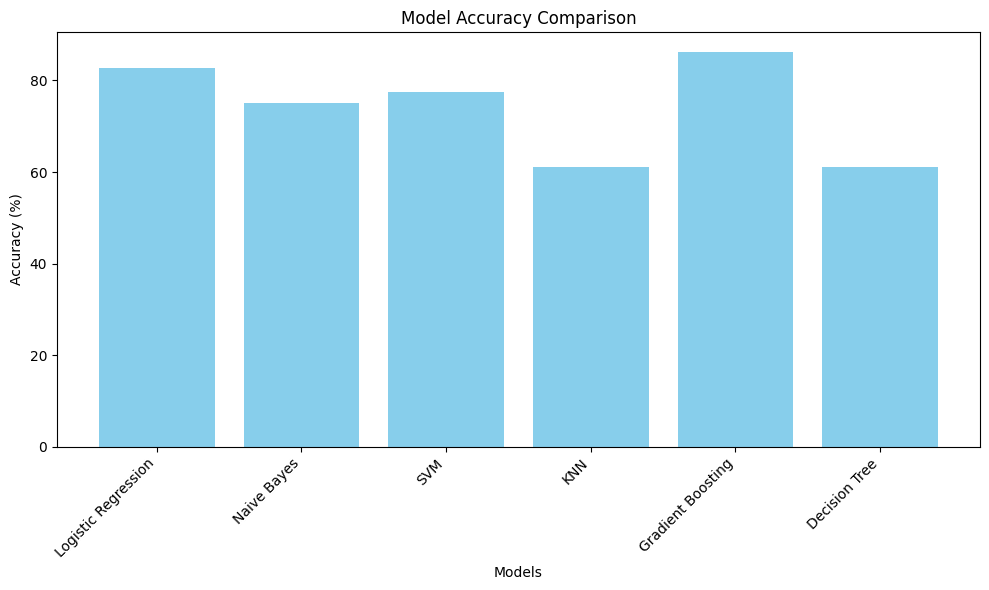

The highest accuracy is achieved by Gradient Boosting with an accuracy of 86.21%


In [ ]:
# prompt: plot the bar graph accoring and print the highest

import matplotlib.pyplot as plt

# Assuming log_reg_accuracy, nb_accuracy, svm_accuracy, and accuracy from other models are defined

accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'Naive Bayes': nb_accuracy,
    'SVM': svm_accuracy,
    'KNN': accuracy,  # Assuming accuracy variable holds the KNN accuracy
    'Gradient Boosting': xgb_accuracy,  # Assuming accuracy variable holds the GB accuracy
    'Decision Tree': accuracy # Assuming accuracy variable holds the DT accuracy
}

# Find the highest accuracy
highest_accuracy_model = max(accuracies, key=accuracies.get)
highest_accuracy = accuracies[highest_accuracy_model]

# Create a bar plot of accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), [acc * 100 for acc in accuracies.values()], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The highest accuracy is achieved by {highest_accuracy_model} with an accuracy of {highest_accuracy * 100:.2f}%")